# Computational Social Science Project #3 

*Group number:* 

*Group members: Rachel Pizatella-Haswell

*Semester:* Fall 2021

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
import random

# Make sure to import other libraries that will be necessary for training models!

In [2]:
# Inspections Data 2011 - 2013
df_pre = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

# Inspections Data 2014
df_post = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                      low_memory=False)

In [3]:
# Look at the inspections data
df_pre.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
df_pre.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
unique_lic_pre = set(df_pre['LICENSE_DESCRIPTION'].unique())
unique_lic_post = set(df_post['LICENSE_DESCRIPTION'].unique())

In [6]:
unique_lic_pre - unique_lic_post

{'Assisted Living/Shared Housing Establishment',
 'Automatic Amusement Device Operator',
 'Day Care Center 2 - 6 Years',
 'Day Care Center Under 2 Years',
 'Day Care Center Under 2 and 2 - 6 Years',
 'Food - Shared Kitchen - Supplemental',
 'Home Occupation',
 'Home Repair',
 'Hospital',
 'Hotel',
 'Long-Term Care Facility',
 'Mobile Food License',
 'Motor Vehicle Repair: Engine/Body(Class III)',
 'Music and Dance',
 'Navy Pier Kiosk License',
 'Navy Pier Vendor (Food)',
 'Outdoor Patio',
 'Residential Real Estate Developer',
 'Retail Food - Seasonal Lakefront Food Establishment',
 'Retail Food Est.-Supplemental License for Dog-Friendly Areas',
 'Riverwalk Venue Liquor License',
 'Scavenger, Private',
 'Shared Kitchen User',
 'Special Event Food',
 'Tire Facilty Class I (100 - 1,000 Tires)'}

In [7]:
# List column names
df_pre.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [8]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
df_pre.drop(columns = ['AKA_Name', 'License','LICENSE_DESCRIPTION',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                       "WARD_PRECINCT",
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

df_pre.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [9]:
# Convert the Inspection Date to a datetime format
df_pre['Inspection_Date'] = pd.to_datetime(df_pre['Inspection_Date'], infer_datetime_format=True)  

In [10]:
df_pre

,,Inspection_Date,Facility_Type,Risk,Inspection_Type,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,2013-01-31,Grocery Store,Risk 3 (Low),Canvass,Pass,Other,0,0,2,0,0,0,0,2.000000,1,19.0,RENEW,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,2011-10-18,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,3,0,0,0,0,2.000000,1,24.0,RENEW,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,2011-10-18,Restaurant,Risk 1 (High),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.000000,1,17.0,RENEW,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,2011-10-19,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,0,0,0,0,2.000000,1,17.0,RENEW,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,2011-10-20,Restaurant,Risk 2 (Medium),Canvass,Fail,Restaurant,0,2,6,0,0,0,0,2.000000,1,24.0,RENEW,2006-07-07,2018-02-15,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393258,CIAO BELLA CAFE,2013-12-17,Restaurant,Risk 1 (High),Canvass,Pass,Restaurant,0,0,6,1,0,2,6,0.452055,0,24.0,ISSUE,2013-03-27,2015-04-15,0.726027,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,25.370000,7.963333,0.776667,10.537839,1.376266,21.726951,0
1395218,Christian Fields Style Bar,2013-12-31,Restaurant,Risk 2 (Medium),Canvass,Pass,Restaurant,0,0,4,0,0,1,4,1.200000,0,3.0,RENEW,2009-11-18,2017-07-15,4.120548,0,0,0,0,0,1,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,56.680038,19.736283,32.355622,0
1395224,W CHICAGO - LAKESHORE,2013-12-31,Restaurant,Risk 1 (High),Canvass,Pass w/ Conditions,Restaurant,3,3,5,0,0,0,0,2.000000,1,18.0,ISSUE,2013-02-13,2019-02-15,0.879452,0,0,0,0,0,0,0,0,0,0,0,0,0.000100,34.586667,9.820000,0.676667,10.937753,0.000002,19.213021,1


## Visualization

What do inspections look like over time?

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

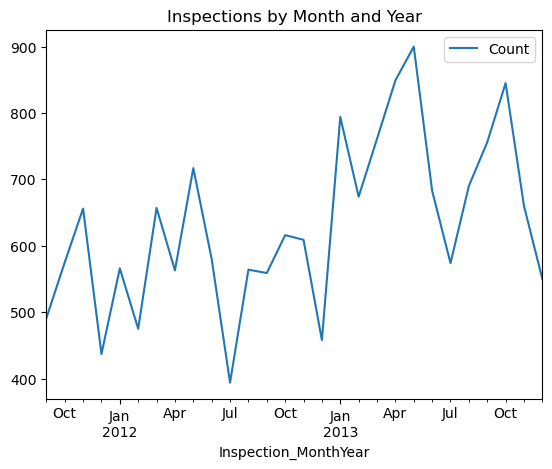

In [11]:
# Visualize Inspections Over Time
df_pre['Inspection_MonthYear'] = df_pre['Inspection_Date'].dt.to_period('M')
counts_by_day = df_pre.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

What do the results look like? 

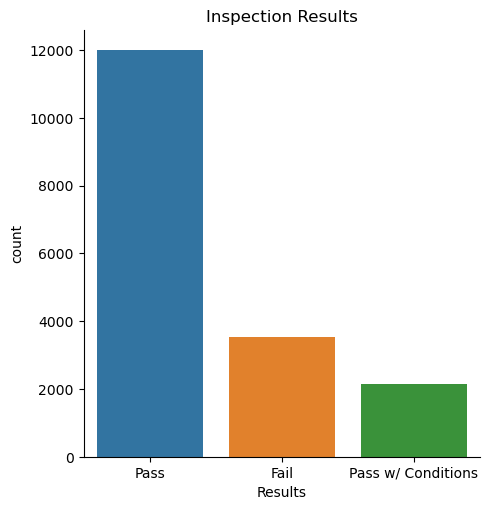

In [12]:
# Inspection Results
sns.catplot(data = df_pre,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

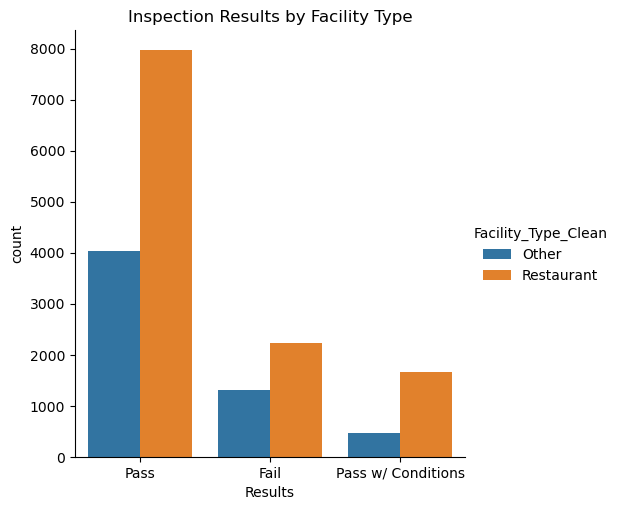

In [13]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = df_pre,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [14]:
# Drop datetime info
df_pre = df_pre.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

df_pre.drop(columns = ['Facility_Type'], inplace = True)

In [15]:
df_pre.columns

Index(['Risk', 'Inspection_Type', 'Results', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

In [16]:
# Set target variable. 
y = df_pre['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = df_pre.drop(columns = ['Results'])

X = pd.get_dummies(X)

In [17]:
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


In [18]:
X.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant', 'APPLICATION_TYPE_C_EXPA',
       'APPLICATION_TYPE_C_LOC', 'APPLICATION_TYPE_ISSUE',
       'APPLICATION_TYPE_RENEW'],
      dtype='object')

In [19]:
X.shape

(15311, 41)

## Fit Models

### Model 1: Random Forest Classifier
Forest based classifiers progressively split (branch) observation into different groups. For classification trees, the final grouping in a leaf determines a prediction for all the observations in that leaf. Specifically, the all observations in that leaf are predicted to be in the most common class in that leaf. In our case, this is a simple vote for how many establishments that fall into a leaf did or did not fail inspection. A forest classifier will create splits based on variables that essentially decrease the variance within leaves the most. In our case this means trying to get leaves that contain almost all failures or all passes.

In a random forest, a large number of trees will be grown and the predictions for each obsevation will be averaged across many trees. At each split, a random forest only considers a subset of predictor variables. This has the effect ensuring that the most powerful predictor variable in the dataset isn't creating the most important split in every tree. This allows the classifier to more effectively learn from all of the predictor variables.

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 987654321)

In [22]:
y_train.shape

(10717, 1)

In [23]:
rf_model = RandomForestClassifier(random_state=12345)
rf_model.fit(X_train, np.ravel(y_train, order = 'C'))

RandomForestClassifier(random_state=12345)

In [24]:
individual_trees = rf_model.estimators_
average_tree_depth = sum(tree.tree_.max_depth for tree in individual_trees) / len(individual_trees)

In [25]:
average_tree_depth

27.95

In [26]:
y_pred = rf_model.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9255550718328254


In [28]:
# Create a hyperparameter grid
grid_space = {'max_depth': [100,150,200], #Depth of the tree
              "criterion": ["gini", "entropy"],
             'n_estimators': [50,100,150], # number of trees in the forest
             'max_features': [1,2,3,4], # max features the RF can try at each split
             'min_samples_leaf':[1,2,3], #Number of obs. required to be in a node
             'min_samples_split':[2,3,4] #How many samples do you need in a node to split it
             }

In [29]:
#rf_cv = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, param_grid=grid_space, cv=3, scoring='accuracy')
rf_grid.fit(X_train, np.ravel(y_train, order = 'C'))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 150, 200],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [30]:
#What are the best parameters
print(rf_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [31]:
rf_grid_model = rf_grid.best_estimator_

In [32]:
rf_grid_pred = rf_grid_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_grid_pred)
print(accuracy)

0.9257727470613845


In [33]:
np.unique(rf_grid_pred) #Before it was only predicting 0s. 

array([0, 1])

## Model 2: Logit
Logisitc regression uses a link function to take a linear combination of variables and turn them into a number between zero to one to model a probability that a binary outcome occurs. This allows us to create a prediction for whether or not an establishment is likely to fail inspection based on a linear combination of the predictive features. In combination with regularization, we can take a dataset with a large number of features and create a logit model for predicting inspection failure that will perform well across different samples.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [35]:
#Set up the logistic regression model
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [36]:
X_train_std

array([[-0.3525061 , -0.52505414,  0.62860274, ..., -0.0483549 ,
        -0.37963533,  0.38572447],
       [-0.3525061 , -0.52505414,  1.1243884 , ..., -0.0483549 ,
        -0.37963533,  0.38572447],
       [-0.3525061 , -0.52505414, -0.85875424, ..., -0.0483549 ,
        -0.37963533,  0.38572447],
       ...,
       [-0.3525061 , -0.52505414,  0.62860274, ..., -0.0483549 ,
         2.63410678, -2.59252417],
       [-0.3525061 , -0.52505414, -0.36296858, ..., -0.0483549 ,
        -0.37963533,  0.38572447],
       [-0.3525061 , -0.52505414,  0.13281708, ..., -0.0483549 ,
        -0.37963533,  0.38572447]])

In [37]:
nan_indices = np.isnan(X_train_std)
np.where(nan_indices)[0]

array([], dtype=int64)

In [38]:
logit_reg = LogisticRegression(max_iter=2000)

# fit the model
logit_model = logit_reg.fit(X_train_std, np.ravel(y_train, order = 'C'))

In [39]:
#param_grid = {'fit_intercept': [True, False] #Should an intercept be included
#             }

param_grid = {'penalty': ['l2'],
               'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}

In [40]:
logit_grid = GridSearchCV(logit_model, param_grid, cv=3)
logit_grid.fit(X_train_std, np.ravel(y_train, order = 'C'))

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=2000),
             param_grid={'fit_intercept': [True, False], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']})

In [41]:
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_train_std)

In [42]:
np.unique(best_logit_pred)

array([0, 1])

In [43]:
logit_accuracy = accuracy_score(y_train, best_logit_pred)
print(logit_accuracy)

0.9248856956237753


In [44]:
logit_grid_model = logit_grid.best_estimator_

## Model 3: BART
Bayesian additive regression trees (BARTs) work in a similar way to the random forests in that BARTs create a number of trees in a random way. But BARTs do not try to classify observations from scratch in each tree. They use create shallow trees and each tree uses tries to predict the residual variance in the outcome from the previous trees as in a boosted trees approach. In the process, trees are radnomly modified (perturbed) to explore potentially better predictions. When perturbations improve the prediction, they are kept.  

I could not get the BART to work so it is commented out below.

In [45]:
import pymc as pm
import pymc_bart as pmb

In [46]:
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.9.1


RANDOM_SEED = 234
np.random.seed(RANDOM_SEED)

with pm.Model() as model_coal: # This line is creating a new probabilistic model using PyMC3. Everything that happens within the with block pertains to this model_coal.
    μ_ = pmb.BART("μ_", X=X_train, Y=np.ravel(y_train, order = 'C'), m=20) # This line is defining a BART model with the predictor variable X set to x_data and the response variable Y set to np.log(y_data). The m=20 parameter is defining the number of trees to use in the BART model. The output of this model is being stored in μ_
    
    μ = pm.Deterministic("μ", pm.math.exp(μ_)) # This line is defining a deterministic variable μ, which is the exponential of μ_. This is done because μ_ is on the log scale due to the np.log(y_data) used in the BART model.
    
    y_pred = pm.Poisson("y_pred", mu=μ.shape, observed=np.ravel(y_train, order = 'C'))
    what = pm.sample(random_seed=RANDOM_SEED)# sample from the posterior distribution of the model

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [47]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [48]:
models = [rf_grid_model, logit_grid_model]

In [49]:
for model in models:
    print(model)
    
    # Accuracy (True positives + negatives) / (All possible outcomes)
    # The proportion of total predictions that are correct 
    model_accuracy_scores = cross_val_score(model, X, np.ravel(y, order = 'C'), cv=3)
    print("Accuracy:", model_accuracy_scores.mean())
    
    #Precision (True positives) / (True + false positives)
    # The proportion of positive predictions that were correct
    precision_scores = cross_val_score(model, X, np.ravel(y, order = 'C'), cv=3, scoring = 'precision')
    print("Precision:", precision_scores.mean())
    
    #Recall (TP)/(TP + FN)
    # In our case this is percent of total establishments that will fail inspection 
    # that our algorithm accurately predicts will fail inspection
    recall_scores = cross_val_score(model, X, np.ravel(y, order = 'C'), cv=3, scoring = 'recall')
    print("Recall:", recall_scores.mean())
        
    # Since there is a tradeoff between precision and recall we compute the F1 score
    # F1 is the harmonic mean of precision and recall
    # F1 = 2 (Precision x Recall) / (Precision + Recall)
    f1_scores = cross_val_score(model, X, np.ravel(y, order = 'C'), cv=3, scoring = 'f1')
    print("F1:", f1_scores.mean())

RandomForestClassifier(criterion='entropy', max_depth=100, max_features=4,
                       min_samples_split=4, random_state=12345)
Accuracy: 0.9175104267962931
Precision: 0.7766224939629266
Recall: 0.8309037900874636
F1: 0.8024487707979238
LogisticRegression(max_iter=2000, solver='saga')
Accuracy: 0.9103258660517067
Precision: 0.7697386448956761
Recall: 0.793974732750243
F1: 0.7805011946668626


### Which of these metrics would you want to prioritize when conducting predictive auditing in this context? Why?
I would probably want to prioritize the F1 score. In our case inspections that result in failures are rare. It is relatively easy for the algorithm to identify when an establishment will pass inspection. We want to maximize the amount of time inspectors can focus on potentially risky establishments. This means that we need to prioritize recall, or the rate at which the algorithm identifies fails. But it is also costly to send inspectors to perform investigations that are likely to pass. We can improve the recall rate at the cost of false positives. So factoring in the precision metric is important. This makes the F1 score a natural scoring metric to use.

## 4 Policy Simulation

### 4.1 Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

In [50]:
# create feature importance dataframe for rfclassifier 
df_features = pd.concat([pd.DataFrame(X.columns), 
                         pd.DataFrame(np.transpose(rf_grid_model.feature_importances_))], 
                        axis = 1)

In [51]:
df_features.head()

,0,0
0,criticalCount,0.018691
1,seriousCount,0.499096
2,minorCount,0.052359
3,pastFail,0.002958
4,pastCritical,0.003459


In [52]:
df_features.columns = ["Feature", "Importance"]
df_features = df_features.sort_values(by='Importance', ascending=False).head(15)
df_features

,Feature,Importance
1,seriousCount,0.499096
2,minorCount,0.052359
28,heat_garbage,0.041062
10,ageAtInspection,0.040406
27,heat_burglary,0.039721
29,heat_sanitation,0.038671
24,temperatureMax,0.036858
25,windSpeed,0.035598
26,humidity,0.032598
9,POLICE_DISTRICT,0.029541


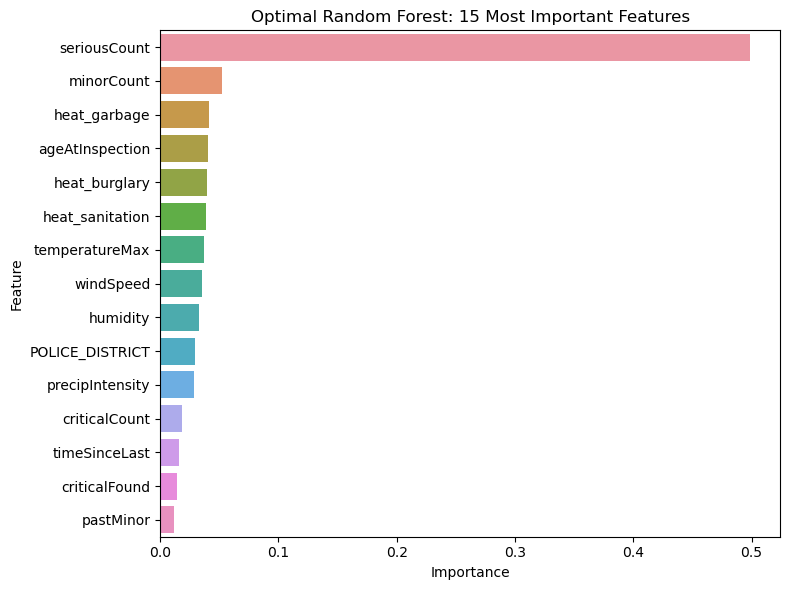

In [53]:
sns.set_palette("tab10")
plt.figure(figsize=(8,6))

sns.barplot(x="Importance", y="Feature", data=df_features)
plt.title('Optimal Random Forest: 15 Most Important Features')

# Format
plt.tight_layout()
plt.show()

### Are there any additional features you wish you could incorporate?

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

In [54]:
rf_preds = rf_grid_model.predict(X_test)

In [55]:
#Returns probability fail = 0 in column 1 and probability fail = 1 in column 2
rf_probs = rf_grid_model.predict_proba(X_test)

In [56]:
audits_df = pd.DataFrame({'result': y_test.flatten(), 'fail_prob': rf_probs[:,1]})

In [57]:
audits_df = audits_df.sort_values(by='fail_prob', ascending=False)

In [58]:
audits_df.head

<bound method NDFrame.head of       result  fail_prob
2887       1   0.903333
2002       1   0.888571
2818       1   0.878167
1037       1   0.875667
2824       1   0.872500
...      ...        ...
1950       0   0.000000
2840       0   0.000000
3511       0   0.000000
2831       0   0.000000
2744       0   0.000000

[4594 rows x 2 columns]>

In [59]:
print(rf_probs.shape, rf_preds.shape)

(4594, 2) (4594,)


In [60]:
audits = sorted(rf_probs[:,1], reverse = True)
audits = audits[0:1000]

Text(0.5, 1.0, 'Predicted Fail Rate: 1000 Most Risky Establishments')

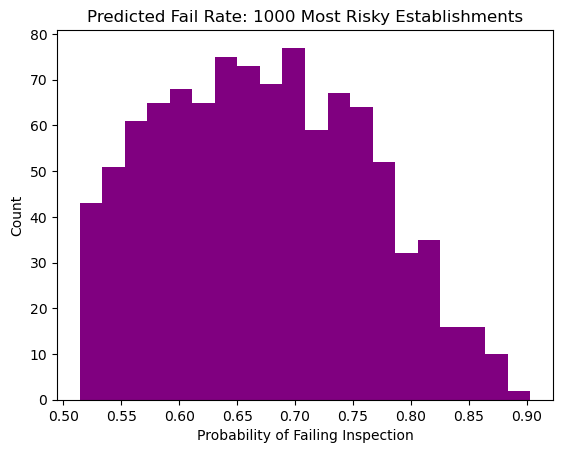

In [61]:
plt.hist(audits, bins = 20, color = 'purple')
plt.xlabel('Probability of Failing Inspection')
plt.ylabel('Count')
plt.title('Predicted Fail Rate: 1000 Most Risky Establishments')

In [62]:
audits_df['result'].mean()

0.2039616891597736

In [63]:
#Get 1000 random audits
df_y = pd.DataFrame(y)
df_y.head()

,0
0,0
1,0
2,1
3,0
4,1


In [64]:
random_audits = df_y.sample(n=1000, random_state = 5678)

In [65]:
random_audits[0].mean()

0.176

### How did random auditing compare to predictive auditing?
Marginally better but not massively so.

### Predict on Data with Unseen Labels

In [66]:
# Inspections Data 2014
df_post = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                      low_memory=False)

df_post.drop(columns = ['AKA_Name', 'License','LICENSE_DESCRIPTION', 'Facility_Type', 'pass_flag', 'fail_flag',
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD_PRECINCT',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE'],
                                     inplace = True)

# set index
df_post.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)
# convert the inspection date to a datetime format
df_post['Inspection_Date'] = pd.to_datetime(df_post['Inspection_Date'])  
df_post = df_post.dropna().drop(['Inspection_Date',
                           'minDate',
                           'maxDate'],
                            axis = 1)

In [67]:
df_post.columns

Index(['Risk', 'Inspection_Type', 'Facility_Type_Clean', 'criticalCount',
       'seriousCount', 'minorCount', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'POLICE_DISTRICT',
       'APPLICATION_TYPE', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')

In [68]:
#X_test_post = df_post
X_test_post = pd.get_dummies(df_post)

In [69]:
X_test_post.head()
#X_test_2014 = pd.get_dummies(X_test_2014)

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920445,SUBWAY,2,0,0,0,0,0,0,0.794521,0,4.0,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,1,0,0,1,0,1,0,0,1,0
920446,SHARKS FISH & CHICKEN,0,0,6,0,0,0,2,0.660274,0,4.0,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,0,1,0,1,0,1,0,0,0,1
920448,P K PETRO INC.,0,1,7,0,0,0,0,2.000000,1,3.0,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,0,0,1,1,1,0,0,0,0,1
920449,"Z T DOLLAR EXCHANGE,INC",1,2,5,0,0,0,0,2.000000,1,3.0,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,0,0,1,1,1,0,0,0,1,0
920450,KENNEDY FISH & CHICKEN,0,1,7,0,0,0,3,0.964384,0,3.0,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.662066,27.638311,78.175677,0,1,0,0,1,0,1,0,0,0,1


In [70]:
X_test_post.columns

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Inspection_Type_Canvass', 'Facility_Type_Clean_Other',
       'Facility_Type_Clean_Restaurant', 'APPLICATION_TYPE_C_EXPA',
       'APPLICATION_TYPE_C_LOC', 'APPLICATION_TYPE_ISSUE',
       'APPLICATION_TYPE_RENEW'],
      dtype='object')

In [71]:
rf_preds_2014 = pd.DataFrame(rf_grid_model.predict(X_test_post))
rf_preds_2014.to_csv('predictions.csv', index = False)

# 5 Discussion Questions
## 5.1 Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

Accuracy is just the proportion of total predictions that are correct. There are many public policy applications where the cost of a false positive is much higher (lower) than the cost of a false negative. Consequently our algorithms should be tuned according to the true cost function that comes from the policy context. 

For instance, we could imagine predicting infrastructure failure for the purposes of prioritizing repairs. Failures are likely to be low and hard to predict, but the cost of a bridge or levee failing may be intolerably high. If our outcome is whether or not a bridge is likely to collapse in the next five years, we likely have a much higher tolerance for false positives than false negatives. Prioritizing recall over precision in this context makes a lot of sense.

## 5.2 Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

A good compromise would be to have a portion of audits that are conducted randomly and a portion that are algorithmically determined. You could even use a reinforcement learning type algorithm to help you systematically update the portion of audits that are random. 

That being said, a lot of the most important features in the random forest are presumably variables that capture actual food saftey issues rather than just correlates of poor food safety. It may be the case that incentivizing restaurants to fix these issues actually does improve their safety for customers. If this is the case then it is not only fine that restaurants change their behavior, it is actually the desired result. It could be the establishments fix these issues ahead of a probable inspection and are then lax in future years because they know the algorithm is unlikely to identify them as high risk. In this case, more years of data would be helpful to see if time since last inspection becomes a more important predictor of inspection failure (although it is already in the top 15 features). Reserving a portion of audits to be randomly determined would also help in this state of the world.